In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
plt.style.use('seaborn')
%matplotlib inline

In [34]:
d_set = pd.read_csv('data/190520_combine.csv', encoding='utf-8')
d_set = d_set.set_index('PLAYER')

In [35]:
d_set_2 = pd.read_csv('data/190519_combine.csv', encoding='utf-8')
d_set_2 = d_set_2.set_index('PLAYER')

In [36]:
pos_map = {
    "SG":"Guard",
    "PG": "Guard",
    "SF": "Forward",
    "PF": "Forward",
    "SF-PF": "Forward",
    "SG-SF": "G/F",
    "PG-SG": "Guard",
    "C": "Center"    
}

d_set['POS_abb'] = d_set.POS.apply(lambda x : pos_map[x])

d_set["height_w/o_shoes(cm)"] = d_set["height_w/o_shoes"].map(lambda x: round((float(x.split("'")[1]) / 12) +  float(x.split("'")[0])) * 30.25, 2)
d_set["wingspan(cm)"] = d_set["wingspan"].map(lambda x: round((float(x.split("'")[1]) / 12) +  float(x.split("'")[0])) * 30.25, 2)

d_set["height_w/o_shoes_f"] = d_set["height_w/o_shoes"].map(lambda x: float(x.split("'")[0]))
d_set["height_w/o_shoes_in"] = d_set["height_w/o_shoes"].map(lambda x: float(x.split("'")[1]) / 12)
d_set["height_w/o_shoes(cm)"] = round((d_set["height_w/o_shoes_f"] + d_set["height_w/o_shoes_in"]) * 30.25, 2)
d_set["wingspan(cm)"] = d_set["wingspan"].map(lambda x: round((float(x.split("'")[0]) + float(x.split("'")[1]) / 12)*30.25, 2))
merged_set = pd.merge(d_set, d_set_2, left_index=True, right_index=True)
merged_set = merged_set.rename(columns={'POS_x':'POS'}).drop(['POS_y'], axis=1)

In [38]:
merged_set = merged_set[['POS_abb', 'height_w/o_shoes(cm)', 'wingspan(cm)', 'Lane Agility Time', 'Standing Vertical Leap', 'Standing Reach']]
merged_set['SVL(cm)'] = merged_set['Standing Vertical Leap'] * 30.25 / 12

c:\users\hjunk\anaconda3\envs\henv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [54]:
merged_set

,POS_abb,height_w/o_shoes(cm),wingspan(cm),Lane Agility Time,Standing Vertical Leap,Standing Reach,SVL(cm)
PLAYER,,,,,,,
Naz Reid,Forward,203.56,219.94,12.03,26.0,9' 1'',65.541667
Shamorie Ponds,Guard,180.24,190.32,11.01,29.0,8' 0.5'',73.104167
Dedric Lawson,Forward,199.15,217.42,11.80,23.5,8' 11.5'',59.239583
Charles Bassey,Center,203.56,220.57,12.65,29.0,9' 1.5'',73.104167
Quentin Grimes,Guard,191.58,201.04,10.83,27.5,8' 4.5'',69.322917
Talen Horton-Tucker,Guard,187.80,214.90,11.34,26.0,8' 7'',65.541667
Moses Brown,Center,214.90,223.72,11.95,27.0,9' 5'',68.062500
Zach Norvell Jr.,Guard,192.84,196.62,11.60,24.0,8' 5'',60.500000
Jordan Poole,Guard,190.32,198.52,10.59,27.5,8' 3.5'',69.322917


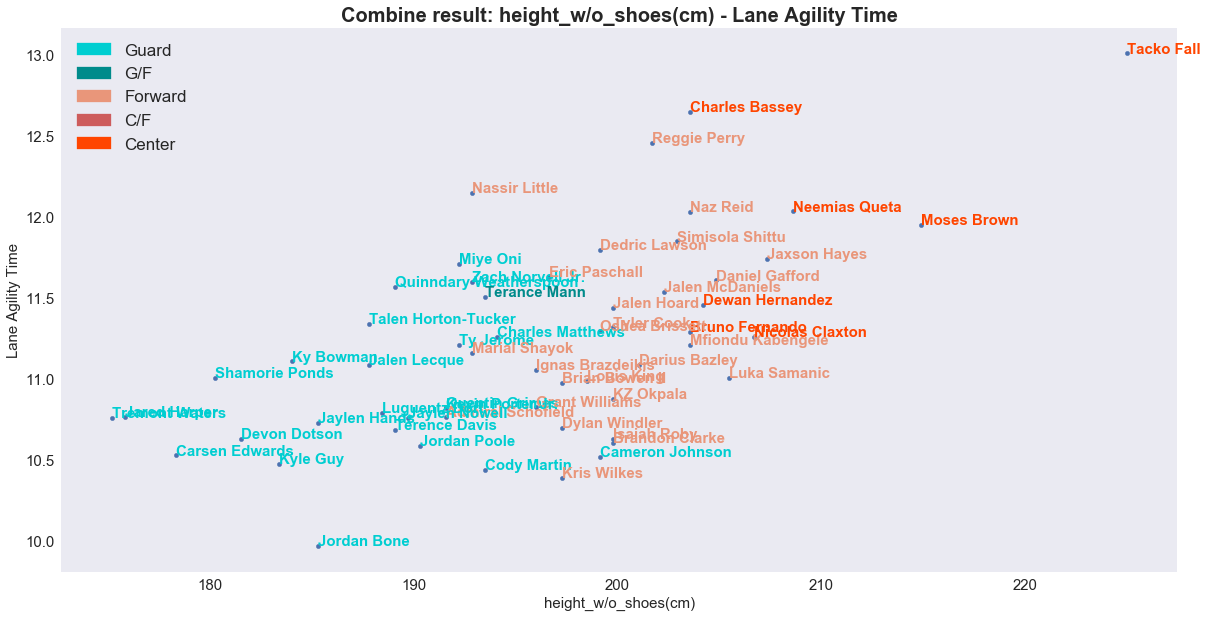

In [56]:
#merged_set.plot.scatter(x='Lane Agility Time', y = 'height_w/o_shoes(cm)')

fig, ax = plt.subplots()
merged_set.plot.scatter('height_w/o_shoes(cm)', 'Lane Agility Time', figsize=(20, 10), fontsize=15, ax=ax)
for k, point in merged_set.iterrows():
    #if k in ["Rudy Gobert", "Joel Embiid", "Clint Capela"]:
    #    ax.annotate(str(k), (point['DFGA'], point['DFG%']), color='red', fontsize=15, fontweight='bold')
        
    if point['POS_abb'] == 'Guard':
        ax.annotate(str(k), (point['height_w/o_shoes(cm)'], point['Lane Agility Time']), color='darkturquoise', fontsize=15, fontweight='bold')
    elif point['POS_abb'] == 'G/F':
        ax.annotate(str(k), (point['height_w/o_shoes(cm)'], point['Lane Agility Time']), color='darkcyan', fontsize=15, fontweight='bold')
    elif point['POS_abb'] == 'Forward':
        ax.annotate(str(k), (point['height_w/o_shoes(cm)'], point['Lane Agility Time']), color='darksalmon', fontsize=15, fontweight='bold')
    elif point['POS_abb'] == 'C/F':
        ax.annotate(str(k), (point['height_w/o_shoes(cm)'], point['Lane Agility Time']), color='indianred', fontsize=15, fontweight='bold')
    else:
        ax.annotate(str(k), (point['height_w/o_shoes(cm)'], point['Lane Agility Time']), color='orangered', fontsize=15, fontweight='bold')
plt.title('Combine result: height_w/o_shoes(cm) - Lane Agility Time', fontsize=20, fontweight="bold")
plt.xlabel('height_w/o_shoes(cm)', fontsize=15)
plt.ylabel('Lane Agility Time', fontsize=15)

g1_patch = mpatches.Patch(color='darkturquoise', label='Guard')
g2_patch = mpatches.Patch(color='darkcyan', label='G/F')
g3_patch = mpatches.Patch(color='darksalmon', label='Forward')
g4_patch = mpatches.Patch(color='indianred', label='C/F')
g5_patch = mpatches.Patch(color='orangered', label='Center')
plt.legend(handles=[g1_patch, g2_patch, g3_patch, g4_patch, g5_patch], fontsize=17)
ax.grid(False)

In [44]:
merged_set['Lane Agility Time'].div(merged_set['height_w/o_shoes(cm)']).sort_values()

PLAYER
Kris Wilkes               0.052672
Cameron Johnson           0.052825
Brandon Clarke            0.053108
Isaiah Roby               0.053209
Luka Samanic              0.053590
Jordan Bone               0.053810
Cody Martin               0.053962
Dylan Windler             0.054243
KZ Okpala                 0.054460
Nicolas Claxton           0.054472
Mfiondu Kabengele         0.055070
Darius Bazley             0.055163
Grant Williams            0.055258
Louis King                0.055360
Bruno Fernando            0.055463
Moses Brown               0.055607
Jordan Poole              0.055643
Brian Bowen II            0.055663
Dewan Hernandez           0.056124
Admiral Schofield         0.056217
Ignas Brazdeikis          0.056431
Kevin Porter Jr.          0.056478
Quentin Grimes            0.056530
Terence Davis             0.056543
Jaxson Hayes              0.056622
Tyler Cook                0.056662
Daniel Gafford            0.056684
Jaylen Nowell             0.056724
Oshea Brisset

In [24]:
d_set = pd.read_csv('data/190514_drive.csv')
d_set = d_set.set_index('Player')

In [10]:
d_set = pd.read_csv('data/190114_cs.csv')
d_set = d_set.set_index('Player')

In [71]:
d_set = pd.read_csv('data/190125_def.csv')
d_set = d_set.set_index('Player')
d_set = d_set.query('POS == "C/F" or POS == "Center"').copy()

In [27]:
d_set = pd.read_csv('data/190514_pullup.csv')
d_set = d_set.set_index('Player')

In [104]:
font = {'family' : 'consolas',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

In [27]:
d_set['PTAS%'] = d_set['PTS%'] + d_set['AST%']

KeyError: 'PTS%'

In [97]:
pos_map = {
    "SG":"Guard",
    "PG": "Guard",
    "SF": "Forward",
    "PF": "Forward",
    "SF-PF": "Forward",
    "SG-SF": "G/F",
    "PG-SG": "Guard",
    "C": "Center"    
}

In [105]:
d_set['POS_abb'] = d_set.POS.apply(lambda x : pos_map[x])

In [18]:
d_set.columns

Index(['POS', 'BODY FAT %', 'HAND LENGTH (inches)', 'HAND WIDTH (inches)',
       'HEIGHT W/O SHOES', 'HEIGHT W/ SHOES', 'STANDING REACH', 'WEIGHT (LBS)',
       'WINGSPAN', 'POS_abb'],
      dtype='object')

KeyError: 'DRIVES'

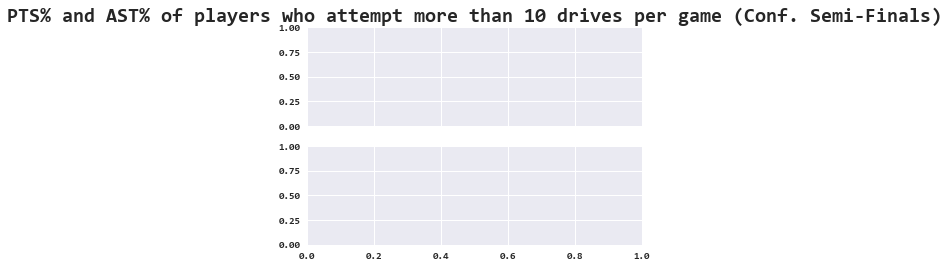

In [8]:
fig, ax = plt.subplots(2, sharex=True)
ax[0].set_title('PTS% and AST% of players who attempt more than 10 drives per game (Conf. Semi-Finals)', fontsize=20, fontweight="bold")
d_set.plot.scatter('DRIVES', 'PTS%', figsize=(20, 10), fontsize=15, ax=ax[0])
for k, point in d_set.iterrows():
    if k in ["Giannis Antetokounmpo", "James Harden", "CJ McCollum", "Kawhi Leonard"]:
        ax[0].annotate(str(k), (point['DRIVES'], point['PTS%']), color='blue', fontsize=15, fontweight='bold')
    else:
        ax[0].annotate(str(k), (point['DRIVES'], point['PTS%']), color='darkcyan', fontsize=15, fontweight='bold')

plt.xlabel('DRIVES PER GAME', fontsize=15)
plt.ylabel('PTS%', fontsize=15)
ax[0].grid(False)

#fig2, ax2 = plt.subplots(1, 2, 2, sharex=ax1)
d_set.plot.scatter('DRIVES', 'AST%', figsize=(20, 10), fontsize=15, ax=ax[1])
for k, point in d_set.iterrows():
    if k in ["James Harden", "Giannis Antetokounmpo", "Kawhi Leonard"]:
        ax[1].annotate(str(k), (point['DRIVES'], point['AST%']), color='orangered', fontsize=15, fontweight='bold')
    else:
        ax[1].annotate(str(k), (point['DRIVES'], point['AST%']), color='darksalmon', fontsize=15, fontweight='bold')
#plt.title('PTS% of players who attempt more than 3 drives per game', fontsize=20, fontweight="bold")
#plt.xlabel('DRIVES PER GAME', fontsize=15)
#plt.ylabel('PTS%', fontsize=15)

ax[1].grid(False)

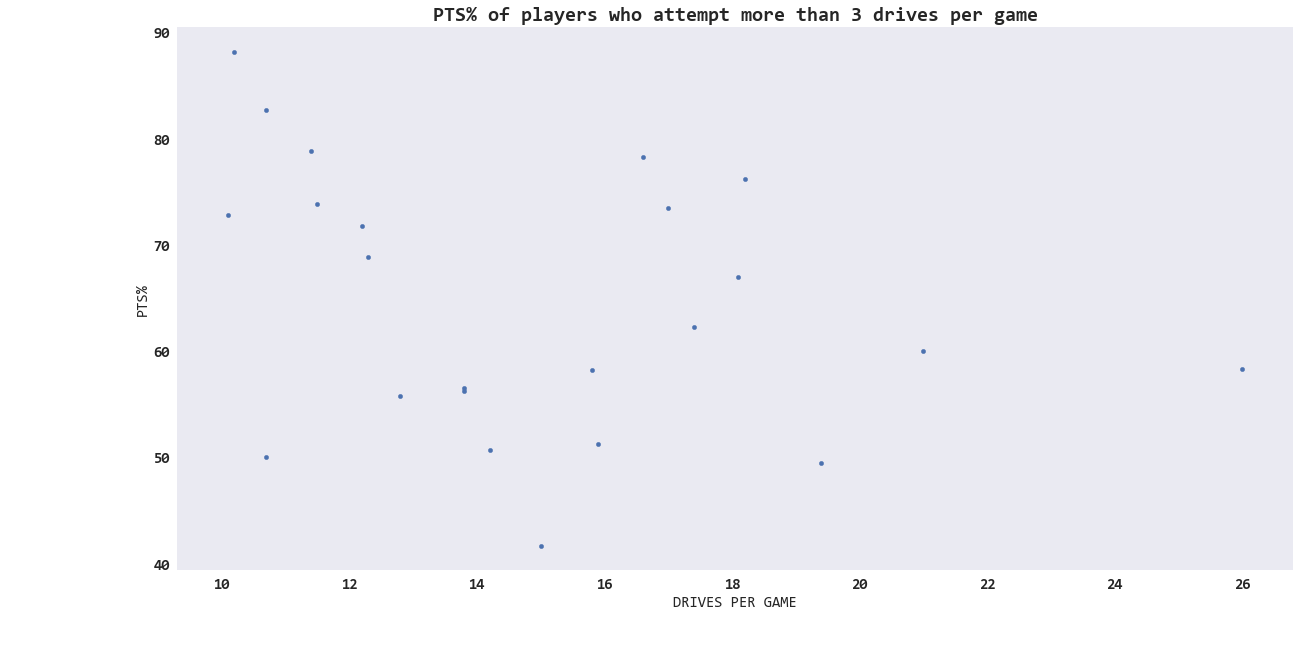

In [6]:
fig, ax = plt.subplots()
d_set.plot.scatter('DRIVES', 'PTAS%', figsize=(20, 10), fontsize=15, ax=ax)
for k, point in d_set.iterrows():
    #if k in ["Rudy Gobert", "Joel Embiid", "Clint Capela"]:
    #    ax.annotate(str(k), (point['DFGA'], point['DFG%']), color='red', fontsize=15, fontweight='bold')
    ax.annotate(str(k), (point['DRIVES'], point['AST%']), color='darkcyan', fontsize=15, fontweight='bold')
plt.title('PTS% of players who attempt more than 3 drives per game', fontsize=20, fontweight="bold")
plt.xlabel('DRIVES PER GAME', fontsize=15)
plt.ylabel('PTS%', fontsize=15)

ax.grid(False)

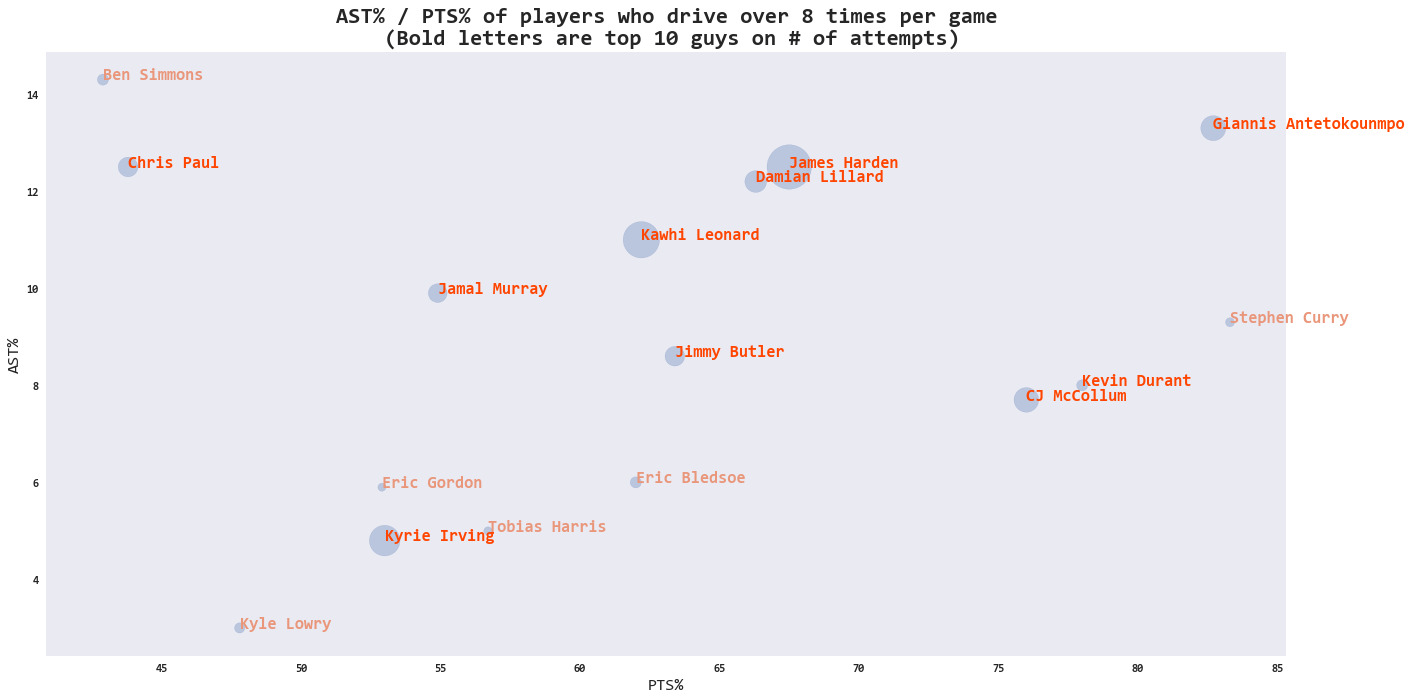

In [26]:
plt.figure(figsize=(20, 10), dpi=80)
plt.scatter(x=d_set['PTS%'], y=d_set['AST%'], s=d_set['DRIVES'].values ** 4 /100, alpha=0.3)
#d_set.plot.scatter(x='PTS%', y='AST%', s='DRIVES'.values, figsize=(20, 10), fontsize=15, ax=ax)
for k, point in d_set.iterrows():
    if k in ["James Harden", "Chris Paul", "Jimmy Butler", "Kyrie Irving", "Jamal Murray", "Kevin Durant", "Giannis Antetokounmpo", "CJ McCollum", "Kawhi Leonard", "Damian Lillard"]:
        plt.annotate(str(k), (point['PTS%'], point['AST%']), color='orangered', fontsize=15, fontweight='bold')
    else:
        plt.annotate(str(k), (point['PTS%'], point['AST%']), color='darksalmon', fontsize=15, fontweight='bold')
plt.title('AST% / PTS% of players who drive over 8 times per game\n (Bold letters are top 10 guys on # of attempts)', fontsize=20, fontweight="bold")
plt.xlabel('PTS%', fontsize=15)
plt.ylabel('AST%', fontsize=15)

plt.grid(False)

In [ ]:
'POS', 'BODY FAT %', 'HAND LENGTH (inches)', 'HAND WIDTH (inches)',
       'HEIGHT W/O SHOES', 'HEIGHT W/ SHOES', 'STANDING REACH', 'WEIGHT (LBS)',
       'WINGSPAN'

In [106]:
d_set["height_w/o_shoes(cm)"] = d_set["height_w/o_shoes"].map(lambda x: round((float(x.split("'")[1]) / 12) +  float(x.split("'")[0])) * 30.25, 2)
d_set["wingspan(cm)"] = d_set["wingspan"].map(lambda x: round((float(x.split("'")[1]) / 12) +  float(x.split("'")[0])) * 30.25, 2)

In [107]:
d_set["height_w/o_shoes_f"] = d_set["height_w/o_shoes"].map(lambda x: float(x.split("'")[0]))
d_set["height_w/o_shoes_in"] = d_set["height_w/o_shoes"].map(lambda x: float(x.split("'")[1]) / 12)
d_set["height_w/o_shoes(cm)"] = round((d_set["height_w/o_shoes_f"] + d_set["height_w/o_shoes_in"]) * 30.25, 2)
d_set["wingspan(cm)"] = d_set["wingspan"].map(lambda x: round((float(x.split("'")[0]) + float(x.split("'")[1]) / 12)*30.25, 2))


In [108]:
d_set = d_set[d_set['POS_abb'].isin(['Forward', 'C/F', 'Center'])]

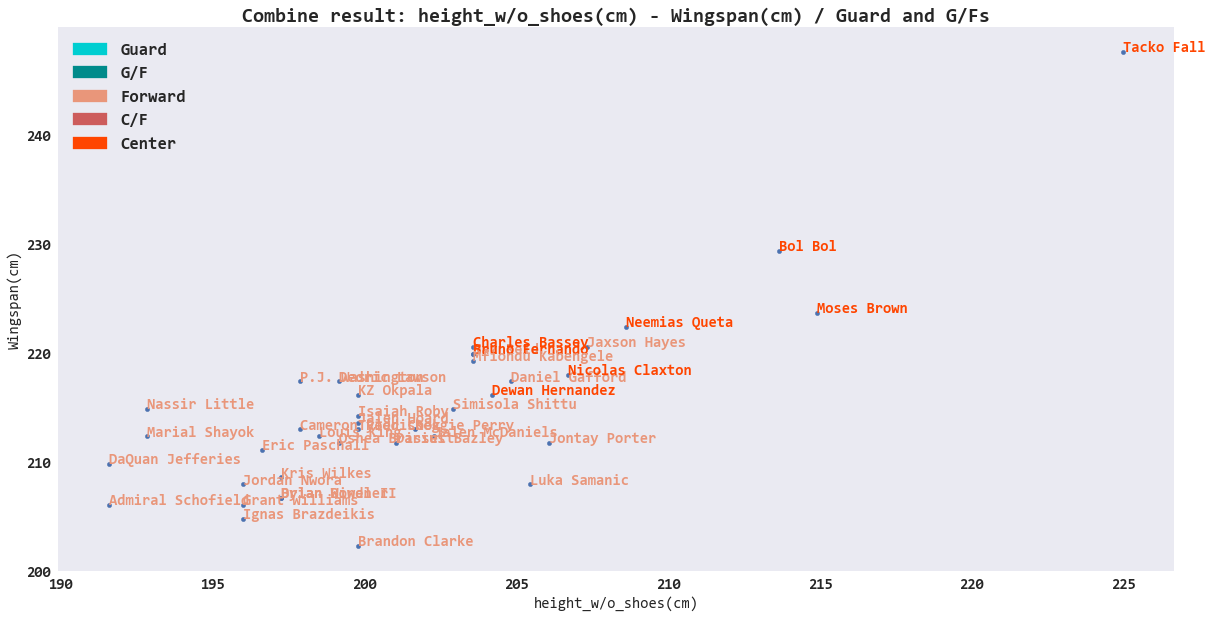

In [109]:
fig, ax = plt.subplots()
d_set.plot.scatter('height_w/o_shoes(cm)', 'wingspan(cm)', figsize=(20, 10), fontsize=15, ax=ax)
for k, point in d_set.iterrows():
    #if k in ["Rudy Gobert", "Joel Embiid", "Clint Capela"]:
    #    ax.annotate(str(k), (point['DFGA'], point['DFG%']), color='red', fontsize=15, fontweight='bold')
        
    if point['POS_abb'] == 'Guard':
        ax.annotate(str(k), (point['height_w/o_shoes(cm)'], point['wingspan(cm)']), color='darkturquoise', fontsize=15, fontweight='bold')
    elif point['POS_abb'] == 'G/F':
        ax.annotate(str(k), (point['height_w/o_shoes(cm)'], point['wingspan(cm)']), color='darkcyan', fontsize=15, fontweight='bold')
    elif point['POS_abb'] == 'Forward':
        ax.annotate(str(k), (point['height_w/o_shoes(cm)'], point['wingspan(cm)']), color='darksalmon', fontsize=15, fontweight='bold')
    elif point['POS_abb'] == 'C/F':
        ax.annotate(str(k), (point['height_w/o_shoes(cm)'], point['wingspan(cm)']), color='indianred', fontsize=15, fontweight='bold')
    else:
        ax.annotate(str(k), (point['height_w/o_shoes(cm)'], point['wingspan(cm)']), color='orangered', fontsize=15, fontweight='bold')
plt.title('Combine result: height_w/o_shoes(cm) - Wingspan(cm) / Guard and G/Fs', fontsize=20, fontweight="bold")
plt.xlabel('height_w/o_shoes(cm)', fontsize=15)
plt.ylabel('Wingspan(cm)', fontsize=15)

g1_patch = mpatches.Patch(color='darkturquoise', label='Guard')
g2_patch = mpatches.Patch(color='darkcyan', label='G/F')
g3_patch = mpatches.Patch(color='darksalmon', label='Forward')
g4_patch = mpatches.Patch(color='indianred', label='C/F')
g5_patch = mpatches.Patch(color='orangered', label='Center')
plt.legend(handles=[g1_patch, g2_patch, g3_patch, g4_patch, g5_patch], fontsize=17)
ax.grid(False)

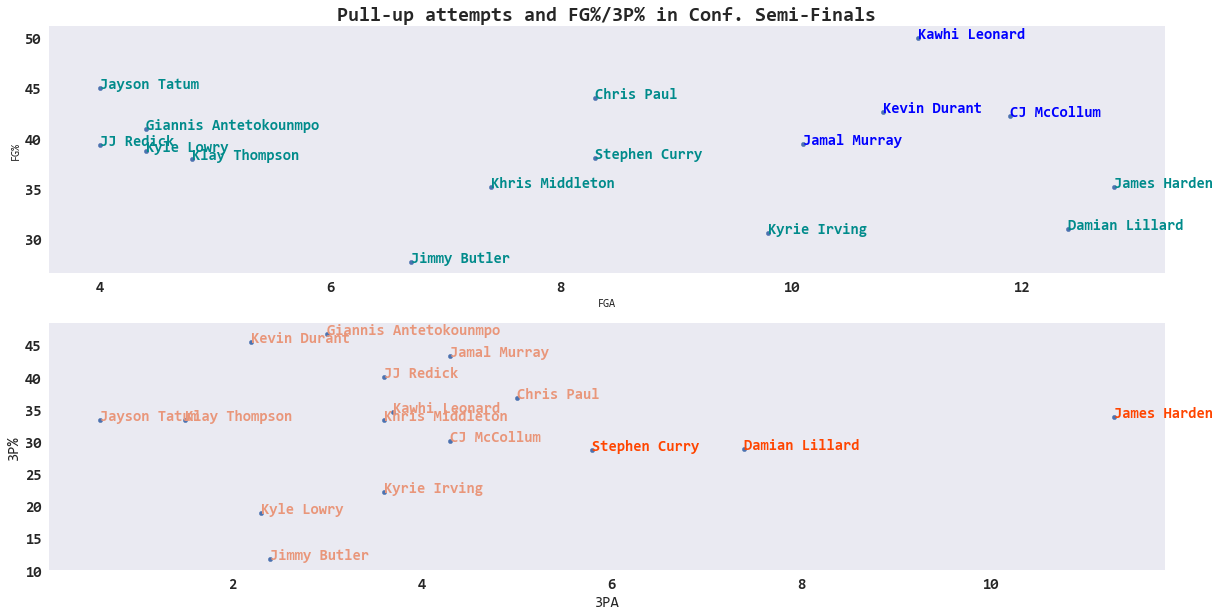

In [35]:
fig, ax = plt.subplots(2, sharex=False)
ax[0].set_title('Pull-up attempts and FG%/3P% in Conf. Semi-Finals', fontsize=20, fontweight="bold")
d_set.plot.scatter('FGA', 'FG%', figsize=(20, 10), fontsize=15, ax=ax[0])
for k, point in d_set.iterrows():
    if k in ["Kawhi Leonard", "Kevin Durant", "CJ McCollum", "Jamal Murray"]:
        ax[0].annotate(str(k), (point['FGA'], point['FG%']), color='blue', fontsize=15, fontweight='bold')
    else:
        ax[0].annotate(str(k), (point['FGA'], point['FG%']), color='darkcyan', fontsize=15, fontweight='bold')

plt.xlabel('DRIVES PER GAME', fontsize=15)
plt.ylabel('PTS%', fontsize=15)
ax[0].grid(False)

#fig2, ax2 = plt.subplots(1, 2, 2, sharex=ax1)
d_set.plot.scatter('3PA', '3P%', figsize=(20, 10), fontsize=15, ax=ax[1])
for k, point in d_set.iterrows():
    if k in ["Damian Lillard", "Stephen Curry", "James Harden", "Jamal M"]:
        ax[1].annotate(str(k), (point['3PA'], point['3P%']), color='orangered', fontsize=15, fontweight='bold')
    else:
        ax[1].annotate(str(k), (point['3PA'], point['3P%']), color='darksalmon', fontsize=15, fontweight='bold')
#plt.title('PTS% of players who attempt more than 3 drives per game', fontsize=20, fontweight="bold")
#plt.xlabel('DRIVES PER GAME', fontsize=15)
#plt.ylabel('PTS%', fontsize=15)

ax[1].grid(False)